In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import math
import numpy as np

# Step 1: Convert into grayscale

True

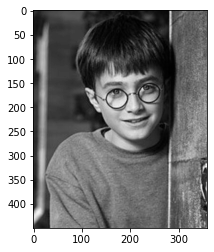

In [3]:
img = cv.imread("hp.jpg")
b, g, r = cv.split(img)
imgGray = 0.2989 * r + 0.5870 * g + 0.1140 * b
plt.imshow(imgGray, cmap='gray')
cv.imwrite("hp_gray.jpg", imgGray)

# Create Gaussian Kernel

In [7]:
sigma = 1.5
size = 3 #Considering a Gausian Kernel of 3*3 dimension
s = int(size) // 2
k =  [ [0]*size for i in range(size) ]
total = float(0)

#Calculate the gaussian value
for i in range(-s, s+1):
    for j in range(-s, s+1):
        exp_Num = -1 * float(math.pow(i, 2) + math.pow(j, 2))
        exp_Den = 2.0 * math.pow(sigma, 2)
        b = np.exp(exp_Num/exp_Den)
        g = float(b / (2 * np.pi * math.pow(sigma, 2)))
        k[i + s][j + s] = g
        total += g 

#Normalize the kernel
for i in range(size):
    for j in range(size):
        k[i][j] /= total
        
#Sum of the kernel
sum1 = float(0)
for i in range(size):
    for j in range(size):
        sum1 += k[i][j]
        
print("Gaussian Kernel")        
#Print the Gaussian Kernal to be used
for i in range(size):
    for j in range(size):
        print(k[i][j], sep=" ", end=" ")
    print()
        

Gaussian Kernel
0.0947416582101747 0.1183180127031206 0.0947416582101747 
0.1183180127031206 0.14776131634681883 0.1183180127031206 
0.0947416582101747 0.1183180127031206 0.0947416582101747 


# Step 2: Gaussian Blur using the above Gaussian Kernel

True

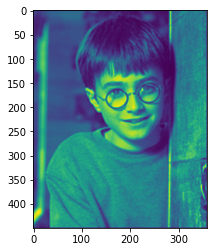

In [19]:
imgGray1 = imgGray
stride = 1
n_H, n_W = imgGray1.shape
g_filter = np.empty((n_H, n_W))

for h in range(n_H):
    vert_start = h * stride

    for w in range(n_W):
        horiz_start = w * stride 
        if h in range(s) or h in range(n_H - s, n_H ) or w in range(s) or w in range(n_W - s, n_W):
            g_filter[h][w] = 0
        else:
            x = 0
            for i in range(size):
                for j in range(size):
                    x = x + (imgGray1[vert_start - s + i][horiz_start - s + j] * k[i][j])
            
            g_filter[h][w] = x / sum1

plt.imshow(g_filter)
cv.imwrite("hp_gaussian.jpg", g_filter)

# Step 3: Determine the intensity gradients

<ipython-input-21-a4c8bcb1e08d>:49: RuntimeWarning: invalid value encountered in double_scalars
  g_angle[h][w] = math.degrees(math.atan(g_y_filter[h][w] / g_x_filter[h][w]))
<ipython-input-21-a4c8bcb1e08d>:49: RuntimeWarning: divide by zero encountered in double_scalars
  g_angle[h][w] = math.degrees(math.atan(g_y_filter[h][w] / g_x_filter[h][w]))


Gradient Magnitude


True

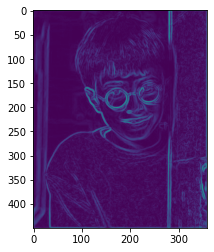

In [21]:
g_Filter1 = g_filter
sobel_x = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ])
sobel_y = np.array([ [-1,-2, -1], [0, 0, 0], [1, 2, 1] ])
n_H1, n_W1 = g_Filter1.shape
g_x_filter = np.empty((n_H1, n_W1))
g_y_filter = np.empty((n_H1, n_W1))

#Calculate G_x
for h in range(n_H1):
    vert_start = h * stride

    for w in range(n_W1):
        horiz_start = w * stride 
        if h in range(s) or h in range(n_H1 - s, n_H1 ) or w in range(s) or w in range(n_W1 - s, n_W1):
            g_x_filter[h][w] = 0
        else:
            x = 0
            for i in range(3):
                for j in range(3):
                    x = x + (g_Filter1[vert_start - s + i][horiz_start - s + j] * sobel_x[i][j])
            
            g_x_filter[h][w] = x / 3
            
#Calculate G_y
for h in range(n_H1):
    vert_start = h * stride

    for w in range(n_W1):
        horiz_start = w * stride 
        if h in range(s) or h in range(n_H1 - s, n_H1 ) or w in range(s) or w in range(n_W1 - s, n_W1):
            g_y_filter[h][w] = 0
        else:
            x = 0
            for i in range(3):
                for j in range(3):
                    x = x + (g_Filter1[vert_start - s + i][horiz_start - s + j] * sobel_y[i][j])
            
            g_y_filter[h][w] = x / 3
            
g_magnitude = np.empty((n_H1, n_W1))
g_angle = np.empty((n_H1, n_W1))

#Calculate the magnitude |G| and the angle of G
for h in range(n_H1):
    for w in range(n_W1):
        g_magnitude[h][w] = math.sqrt(math.pow(g_x_filter[h][w], 2) + math.pow(g_y_filter[h][w], 2))
        if g_x_filter[h][w] == 0:
            g_angle[h][w] = 90
        g_angle[h][w] = math.degrees(math.atan(g_y_filter[h][w] / g_x_filter[h][w]))


print("Gradient Magnitude")
plt.imshow(g_magnitude)
cv.imwrite("hp_g_x.jpg", g_x_filter)
cv.imwrite("hp_g_y.jpg", g_y_filter)
cv.imwrite("hp_grad.jpg", g_magnitude)

# Step 4: Non- Maximum Suppression

True

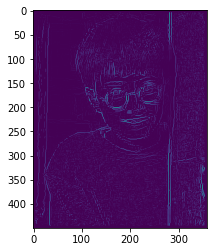

In [23]:
g_mag = g_magnitude
n_H2, n_W2 = g_magnitude.shape
suppressed_arr = np.empty((n_H2, n_W2))
for h in range(n_H2):
    for w in range(n_W2):
        if h in range(5) or h in range(n_H2 - 5, n_H2) or w in range(5) or w in range(n_W2 - 5, n_W2):
                suppressed_arr[h][w] = 0
        else:
            x = g_angle[h][w]
            y = g_mag[h][w]
            
            # checking if gradient angle is in 0th sector
            if (-22.5 < x <= 22.5) or ((180 >= x > 157.5) and (-180 <= x <= -157.5)):
                # checks if the current pixel is greater than the sector neighbors
                if y >= g_mag[h][w-1] and y >= g_mag[h][w+1]:
                    suppressed_arr[h][w] = int(round(y))

            # checking if gradient angle is in 1st sector
            elif (22.5 < x <= 67.5) or (-112.5 >= x > -157.5):
                # checks if the current pixel is greater than the sector neighbors
                if y >= g_mag[h-1][w+1] and y >= g_mag[h+1][w-1]:
                        suppressed_arr[h][w] = int(round(y))

            # checking if gradient angle is in 2nd sector
            elif (67.5 < x <= 112.5) or (-67.5 >= x > -112.5):
                    # checks if the current pixel is greater than the sector neighbors
                    if y >= g_mag[h-1][w] and y >= g_mag[h+1][w]:
                        suppressed_arr[h][w] = int(round(y))

            # checking if gradient angle is in 3rd sector
            elif (112.5 < x <= 157.5) or (-22.5 >= x > -67.5):
                    # checks if the current pixel is greater than the sector neighbors
                    if y >= g_mag[h-1][w-1] and y >= g_mag[h+1][w+1]:
                        suppressed_arr[h][w] = int(round(y))
plt.imshow(suppressed_arr)
cv.imwrite("hp_suppressed.jpg", suppressed_arr)

# Step 5: Hysterisis Thresholding

In [32]:
suppressed_image = suppressed_arr

image_height = suppressed_image.shape[0]
image_width = suppressed_image.shape[1]
gradient_angle = g_angle  
maximum_value = np.amax(suppressed_image)
high_threshold_ratio = 0.70
low_threshold_ratio = 0.30

high_threshold = maximum_value * high_threshold_ratio
low_threshold = maximum_value * low_threshold_ratio

output_image = np.empty((image_height, image_width))

strong_edge_pixel = suppressed_image > high_threshold
output_image[ strong_edge_pixel ] = 255

no_edge_pixel = suppressed_image < low_threshold
output_image[ no_edge_pixel ] = 0
weak_edge_pixel = (suppressed_image >= low_threshold) & (suppressed_image <= high_threshold)
index_weak_edge_pixel = np.argwhere(weak_edge_pixel)

for i in index_weak_edge_pixel:
    x = i[ 0 ]
    y = i[ 1 ]
    pixel_gradient = gradient_angle[ x ][ y ]

    if 0 < x < image_width and 0 < y < image_height:

        # checking if any of the 8 neighbors is a strong edge pixel and classifying the pixel as an edge pixel
        if (((suppressed_image[ x - 1 ][ y ] in strong_edge_pixel) and abs(
                    gradient_angle[ x - 1 ][ y ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x + 1 ][ y ] in strong_edge_pixel) and abs(
                        gradient_angle[ x + 1 ][ y ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x ][ y + 1 ] in strong_edge_pixel) and abs(
                        gradient_angle[ x ][ y + 1 ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x ][ y - 1 ] in strong_edge_pixel) and abs(
                        gradient_angle[ x ][ y - 1 ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x - 1 ][ y + 1 ] in strong_edge_pixel) and abs(
                        gradient_angle[ x - 1 ][ y + 1 ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x - 1 ][ y - 1 ] in strong_edge_pixel) and abs(
                        gradient_angle[ x - 1 ][ y - 1 ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x + 1 ][ y - 1 ] in strong_edge_pixel) and abs(
                        gradient_angle[ x + 1 ][ y - 1 ] - pixel_gradient) > 45) or
                    ((suppressed_image[ x + 1 ][ y - 1 ] in strong_edge_pixel) and abs(
                        gradient_angle[ x + 1 ][ y - 1 ] - pixel_gradient) > 45)):
            output_image[ x ][ y ] = 255

Final Resultant Image


True

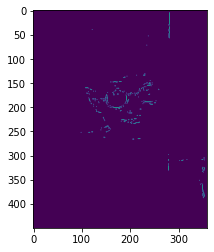

In [34]:
print("Final Resultant Image")
plt.imshow(output_image)
cv.imwrite("hp_final_canny.jpg", output_image)